# The Pandemic


## Look at the data

In [3]:
import pandas as pd
data = pd.read_csv('./data/hero-network.csv')

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574467 entries, 0 to 574466
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   hero1   574467 non-null  object
 1   hero2   574467 non-null  object
dtypes: object(2)
memory usage: 8.8+ MB


It has more than half a million connections. So, it is not an exaggeration to speak of a universe of superheroes. Let's take a first glimpse.

In [5]:
data.head()


,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [6]:
import networkx as nx
graph = nx.from_pandas_edgelist(data, source='hero1', target='hero2')

In [7]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 6426
Number of edges: 167219
Average degree:  52.0445


In [8]:
print("Network density:", nx.density(graph))

Network density: 0.00810031232553549


In [9]:
heroes = {
    'MEDUSA/MEDUSALITH AM',
    'ARCLIGHT/PHILLIPA SO',
    'WOLVERINE/LOGAN ',
    'SCARLET WITCH/WANDA ',
    'ARAGORN',
    'OVERMIND/GROM',
    'BATTLEAXE/',
    'ION/',
    'PINK PEARL/'
}

relations = data[(data.hero1.isin(heroes)) & (data.hero2.isin(heroes))]

relations.info()
#CAPTION Creating a sub network

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 895 to 573288
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   hero1   103 non-null    object
 1   hero2   103 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


In [10]:
sub_graph = nx.from_pandas_edgelist(relations, source='hero1', target='hero2')
print(nx.info(sub_graph))
print("\nNetwork density:", nx.density(sub_graph))

Name: 
Type: Graph
Number of nodes: 9
Number of edges: 13
Average degree:   2.8889

Network density: 0.3611111111111111


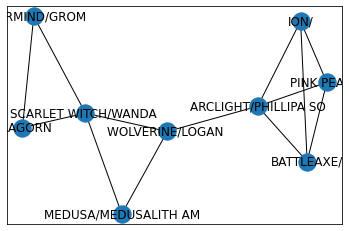

In [11]:
nx.draw_networkx(sub_graph)


## Analytically Derive Measures


In [12]:
print('Diameter of the subgraph: {}'.format(nx.diameter(sub_graph)))


Diameter of the subgraph: 4


In [13]:
overmind_ion_path = nx.shortest_path(
    sub_graph, source="OVERMIND/GROM", target="ION/"
)
print("Shortest path between Overmind and ion is:")
for item in overmind_ion_path:
    print ("- ", item)
    
print("With length {}".format(len(overmind_ion_path)))
#CAPTION Calculate the shortest path between two nodes

Shortest path between Overmind and ion is:
-  OVERMIND/GROM
-  SCARLET WITCH/WANDA 
-  WOLVERINE/LOGAN 
-  ARCLIGHT/PHILLIPA SO
-  ION/
With length 5


In [14]:
nx.eccentricity(sub_graph)

{'SCARLET WITCH/WANDA ': 3,
 'WOLVERINE/LOGAN ': 2,
 'MEDUSA/MEDUSALITH AM': 3,
 'ARAGORN': 4,
 'OVERMIND/GROM': 4,
 'ARCLIGHT/PHILLIPA SO': 3,
 'ION/': 4,
 'BATTLEAXE/': 4,
 'PINK PEARL/': 4}

In [15]:
dict(sub_graph.degree(sub_graph.nodes()))

{'SCARLET WITCH/WANDA ': 4,
 'WOLVERINE/LOGAN ': 3,
 'MEDUSA/MEDUSALITH AM': 2,
 'ARAGORN': 2,
 'OVERMIND/GROM': 2,
 'ARCLIGHT/PHILLIPA SO': 4,
 'ION/': 3,
 'BATTLEAXE/': 3,
 'PINK PEARL/': 3}

In [16]:
scarlet_arclight_path = nx.shortest_path(
    sub_graph, source="SCARLET WITCH/WANDA ", target="ARCLIGHT/PHILLIPA SO"
)
print("Shortest path between Scarlet and Arclight is:")
for item in scarlet_arclight_path:
    print ("- ", item)
    
print("With length {}".format(len(scarlet_arclight_path)))
#CAPTION Calculate the shortest path between two hubs

Shortest path between Scarlet and Arclight is:
-  SCARLET WITCH/WANDA 
-  WOLVERINE/LOGAN 
-  ARCLIGHT/PHILLIPA SO
With length 3


In [17]:
nx.betweenness_centrality(sub_graph)

{'SCARLET WITCH/WANDA ': 0.42857142857142855,
 'WOLVERINE/LOGAN ': 0.5714285714285714,
 'MEDUSA/MEDUSALITH AM': 0.0,
 'ARAGORN': 0.0,
 'OVERMIND/GROM': 0.0,
 'ARCLIGHT/PHILLIPA SO': 0.5357142857142857,
 'ION/': 0.0,
 'BATTLEAXE/': 0.0,
 'PINK PEARL/': 0.0}

In [18]:
from networkx.algorithms import community
for item in community.greedy_modularity_communities(sub_graph):
    print("\nCommunity: ")
    for hero in item:
        print("- ", hero)


Community: 
-  SCARLET WITCH/WANDA 
-  ARAGORN
-  OVERMIND/GROM
-  WOLVERINE/LOGAN 
-  MEDUSA/MEDUSALITH AM

Community: 
-  ARCLIGHT/PHILLIPA SO
-  BATTLEAXE/
-  PINK PEARL/
-  ION/


In [19]:
modularity_dict = {}

for i,c in enumerate(community.greedy_modularity_communities(sub_graph)):
    for name in c: 
        modularity_dict[name] = i 

modularity_dict

{'SCARLET WITCH/WANDA ': 0,
 'ARAGORN': 0,
 'OVERMIND/GROM': 0,
 'WOLVERINE/LOGAN ': 0,
 'MEDUSA/MEDUSALITH AM': 0,
 'ARCLIGHT/PHILLIPA SO': 1,
 'BATTLEAXE/': 1,
 'PINK PEARL/': 1,
 'ION/': 1}

In [20]:
comm = community.greedy_modularity_communities(sub_graph)

l = list(map(lambda c: list(c), comm))

k = sub_graph.subgraph(l[0])
print(nx.info(k))
print("\nNetwork density: {} \n".format(nx.density(k)))

k2 = sub_graph.subgraph(l[1])
print(nx.info(k2))
print("\nNetwork density:", nx.density(k2))
#CAPTION Compare subgroups

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 6
Average degree:   2.4000

Network density: 0.6 

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 6
Average degree:   3.0000

Network density: 1.0


In [21]:
print("Shortest paths:")
sp = nx.eccentricity(k)
for hero in sp:
    print ("- ", hero, ": ", sp[hero])
    
ce = dict(sub_graph.degree(k.nodes()))

print("\nConnected edges:")
for hero in ce:
    print ("- ", hero, ": ", ce[hero])

print("\nBetweenness:")
bet = nx.betweenness_centrality(k)
for hero in bet:
    print ("- ", hero, ": ", bet[hero])

Shortest paths:
-  SCARLET WITCH/WANDA  :  1
-  WOLVERINE/LOGAN  :  2
-  MEDUSA/MEDUSALITH AM :  2
-  ARAGORN :  2
-  OVERMIND/GROM :  2

Connected edges:
-  SCARLET WITCH/WANDA  :  4
-  WOLVERINE/LOGAN  :  3
-  MEDUSA/MEDUSALITH AM :  2
-  ARAGORN :  2
-  OVERMIND/GROM :  2

Betweenness:
-  SCARLET WITCH/WANDA  :  0.6666666666666666
-  WOLVERINE/LOGAN  :  0.0
-  MEDUSA/MEDUSALITH AM :  0.0
-  ARAGORN :  0.0
-  OVERMIND/GROM :  0.0
